In [ ]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.layers import*
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import itertools
from tensorflow.keras.models import load_model
import keras
import csv
from PIL import Image
from keras import backend as K
from tensorflow.keras.utils import plot_model

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/FYP/FINAL_SIGNS_PROCESSED.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv")
test_df = pd.read_csv("/content/drive/MyDrive/FYP/FINAL_4_TEST.csv")


In [ ]:
train_df.columns =["GENUINE1","GENUINE2","GENUINE3","GENUINE4","TEST","OUTCOME","SET"]
test_df.columns =["GENUINE1","GENUINE2","GENUINE3","GENUINE4","TEST","OUTCOME","SET"]

In [ ]:
train_df

,GENUINE1,GENUINE2,GENUINE3,GENUINE4,TEST,OUTCOME,SET
0,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_06.PNG,1,Train
1,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_07.PNG,1,Train
2,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_08.PNG,1,Train
3,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_09.PNG,1,Train
4,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_10.PNG,1,Train
...,...,...,...,...,...,...,...
959,01_048.png,02_048.png,03_048.png,04_048.png,02_0204048.PNG,0,Train
960,01_048.png,02_048.png,03_048.png,04_048.png,03_0106048.PNG,0,Train
961,01_048.png,02_048.png,03_048.png,04_048.png,03_0204048.PNG,0,Train
962,01_048.png,02_048.png,03_048.png,04_048.png,04_0106048.PNG,0,Train


In [ ]:
SIGN_PATH="/content/FINAL_SIGNS/"

In [ ]:
x_train_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
       img1 = plt.imread(SIGN_PATH + row[0])
       img1=resize(img1,(118,118,3))
       x_train_list.append(img1)
       img2 = plt.imread(SIGN_PATH + row[1])
       img2=resize(img2,(118,118,3))
       x_train_list.append(img2)
       img3 = plt.imread(SIGN_PATH + row[2])
       img3=resize(img3,(118,118,3))
       x_train_list.append(img3)
       img4 = plt.imread(SIGN_PATH + row[3])
       img4=resize(img4,(118,118,3))
       x_train_list.append(img4)
       img5 = plt.imread(SIGN_PATH + row[4])
       img5=resize(img5,(118,118,3))
       x_train_list.append(img5)

print("X Train list:", x_train_list)
x_train_arr = np.array(x_train_list)
print("X TRAIN array:", x_train_arr)
x_train_arr.shape

X Train list: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



X TRAIN array: [[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.  

(4825, 118, 118, 3)

In [ ]:
y_train_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        y_train_list.append(row[5])
print("Y Train list:", y_train_list)
y_train_arr = np.array(y_train_list)
print("Y TRAIN array:", y_train_arr)
y_train_arr.shape

Y Train list: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

(965,)

In [ ]:
x_test_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TEST.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        img1 = plt.imread(SIGN_PATH + row[0])
        img1=resize(img1,(118,118,3))
        x_test_list.append(img1)
        img2 = plt.imread(SIGN_PATH + row[1])
        img2=resize(img2,(118,118,3))
        x_test_list.append(img2)
        img3 = plt.imread(SIGN_PATH + row[2])
        img3=resize(img3,(118,118,3))
        x_test_list.append(img3)
        img4 = plt.imread(SIGN_PATH + row[3])
        img4=resize(img4,(118,118,3))
        x_test_list.append(img4)
        img5 = plt.imread(SIGN_PATH + row[4])
        img5=resize(img5,(118,118,3))
        x_test_list.append(img5)

print("X TEST list:", x_test_list)
x_test_arr = np.array(x_test_list)
print("X TEST array:", x_test_arr)
x_test_arr.shape

Streaming output truncated to the last 5000 lines.
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.8724339 , 0.8724339 , 0.8724339 ],
        [0.3269243 , 0.3269243 , 0.3269243 ],
        [0.5491247 , 0.5491247 , 0.5491247 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.39534584, 0.39534584, 0.39534584],
        [0.5032821 , 0.5032821 , 0.5032821 ],
        [0.9514674 , 0.9514674 , 0.9514674 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.      

(2080, 118, 118, 3)

In [ ]:
y_test_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TEST.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        y_test_list.append(row[5])
print("Y TEST list:", y_test_list)
y_test_arr = np.array(y_test_list)
print("Y TEST array:", y_test_arr)
y_test_arr.shape

Y TEST list: ['1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '

(416,)

In [ ]:
x_train_arr.shape,y_train_arr.shape,x_test_arr.shape,y_test_arr.shape

((4825, 118, 118, 3), (965,), (2080, 118, 118, 3), (416,))

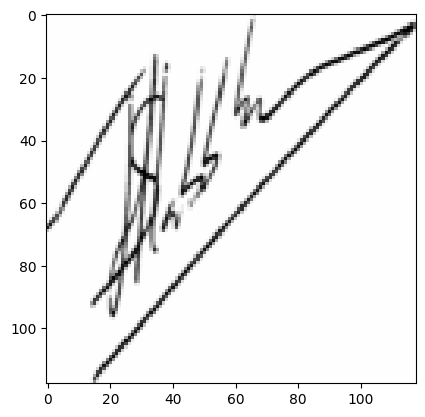

In [ ]:
imgr = imread(os.path.join(SIGN_PATH,test_df["GENUINE4"][24]))
imgr=resize(imgr,(118,118,3))
plt.imshow(imgr)

In [ ]:
def euclidean_distance(vectors):
    x, y = vectors
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))
    #try

In [ ]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 one_input (InputLayer)         [(None, 118, 118, 3  0           []                               
                                )]                                                                
                                                                                                  
 two_input (InputLayer)         [(None, 118, 118, 3  0           []                               
                                )]                                                                
                                                                                                  
 three_input (InputLayer)       [(None, 118, 118, 3  0           []                               
                                )]                                                            

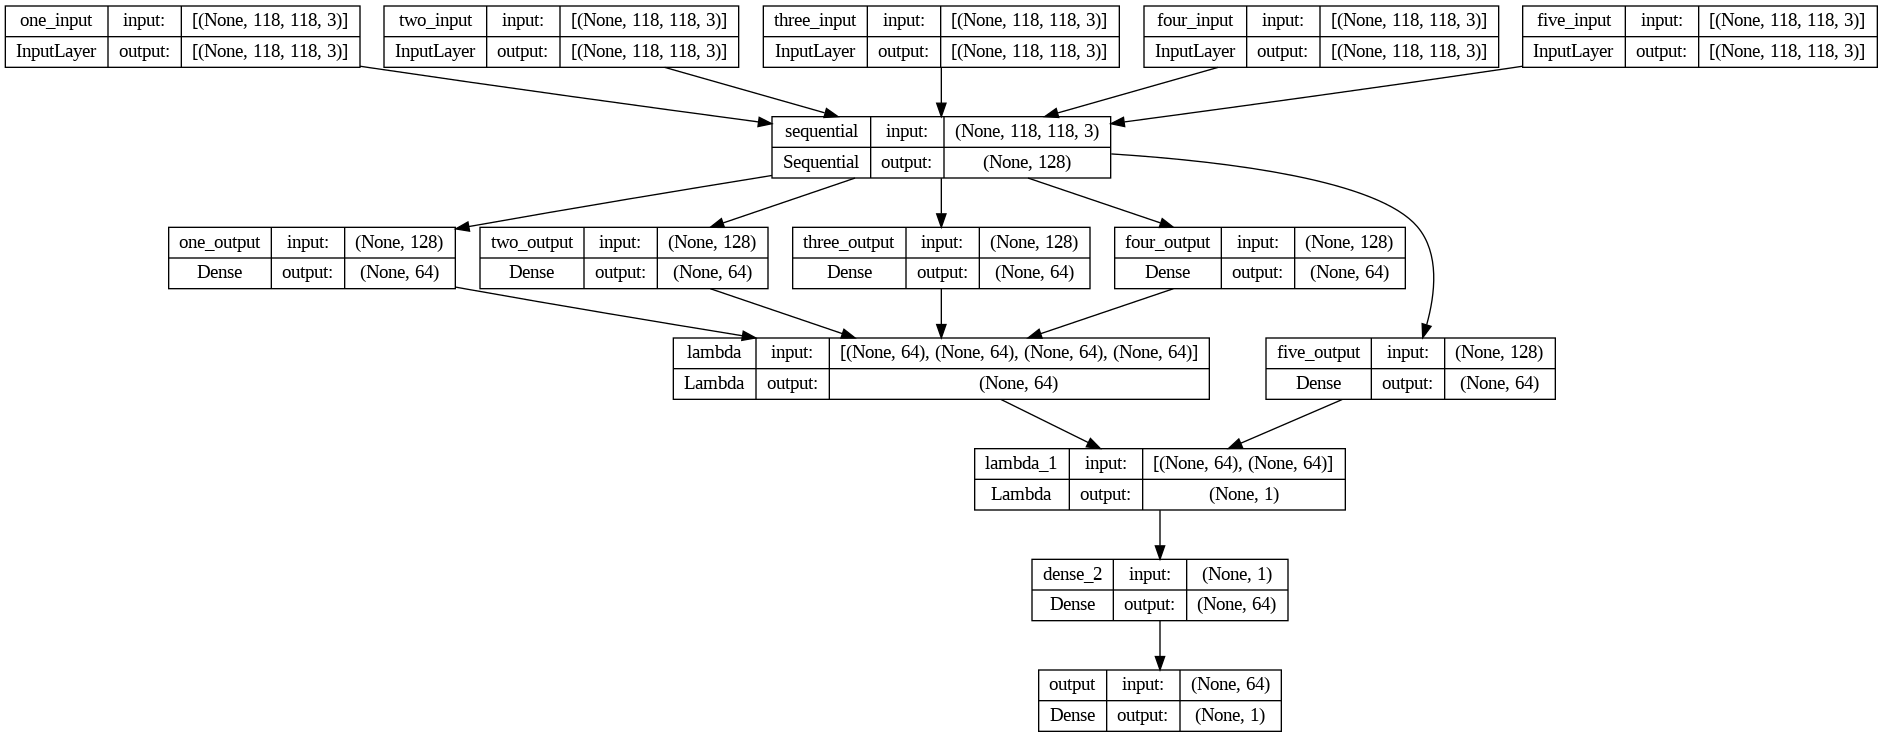

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
import tensorflow as tf
"""
def euclidean_distance(vectors):
    x, y = vectors
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, _ = shapes
    return (shape1[0], 1)
"""
def create_model(input_shape):
    Depth = 64
    seq = Sequential()
    seq.add(Conv2D(Depth, kernel_size=(11, 11), activation='relu', strides=1, input_shape=input_shape,
                   kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0005), padding='same'))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    seq.add(Conv2D(Depth * 2, kernel_size=(5, 5), activation='relu', strides=1,
                   kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0005), padding='same'))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    seq.add(Dropout(0.3))
    seq.add(Conv2D(Depth * 4, kernel_size=(3, 3), activation='relu', strides=1,
                   kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0005), padding='same'))
    seq.add(Conv2D(Depth * 4, kernel_size=(3, 3), activation='relu', strides=1,
                   kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0005), padding='same'))
    seq.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    seq.add(Dropout(0.3))
    seq.add(Flatten())
    seq.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer='glorot_uniform'))
    seq.add(Dropout(0.5))
    seq.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer='glorot_uniform'))

    one_input = Input(shape=input_shape, name='one_input')
    one_branch = seq(one_input)

    two_input = Input(shape=input_shape, name='two_input')
    two_branch = seq(two_input)

    three_input = Input(shape=input_shape, name='three_input')
    three_branch = seq(three_input)

    four_input = Input(shape=input_shape, name='four_input')
    four_branch = seq(four_input)

    five_input = Input(shape=input_shape, name='five_input')
    five_branch = seq(five_input)
    one_output = Dense(64, activation='relu', name='one_output')(one_branch)
    two_output = Dense(64, activation='relu', name='two_output')(two_branch)
    three_output = Dense(64, activation='relu', name='three_output')(three_branch)
    four_output = Dense(64, activation='relu', name='four_output')(four_branch)
    five_output = Dense(64, activation='relu', name='five_output')(five_branch)

    average = Lambda(lambda x: tf.reduce_mean(x, axis=0))([one_output, two_output, three_output, four_output])
    distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([average, five_output])
    output = Dense(1, activation='sigmoid', name='output')(dense)

    model = Model(inputs=[one_input, two_input, three_input, four_input, five_input], outputs=[output])
    return model

# Define the input shape
input_shape = (118, 118, 3)

# Create the model
model = create_model(input_shape)

# Print the model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
def MakePairs(X, Y):
    X_pairs, Y_pairs = [], []
    pair_count = 0
    for i in range(0, len(X) - 4, 5):
        image_A = X[i]
        image_B = X[i + 1]
        image_C = X[i + 2]
        image_D = X[i + 3]
        image_E = X[i + 4]
        X_pairs.append([image_A, image_B, image_C, image_D, image_E])
        pair_count += 1
        """
        plt.figure()
        plt.subplot(151)
        plt.imshow(image_A)
        plt.title('Image A')
        plt.subplot(152)
        plt.imshow(image_B)
        plt.title('Image B')
        plt.subplot(153)
        plt.imshow(image_C)
        plt.title('Image C')
        plt.subplot(154)
        plt.imshow(image_D)
        plt.title('Image D')
        plt.subplot(155)
        plt.imshow(image_E)
        plt.title('Image E')
        plt.show()
        """
    for j in range(0, len(X_pairs)):
        Y_pairs.append(Y[j])
    X_pairs = np.array(X_pairs)
    Y_pairs = np.array(Y_pairs)
    print(f'Total pairs made: {pair_count}')
    return X_pairs, Y_pairs


In [ ]:
X_train_pairs,Y_train_pairs=MakePairs(x_train_arr,y_train_arr)
X_train_pairs.shape,Y_train_pairs.shape
Y_train_pairs=Y_train_pairs.astype(float)
X_train_pairs.shape,Y_train_pairs.shape

Total pairs made: 965


((965, 5, 118, 118, 3), (965,))

In [ ]:
X_test_pairs,Y_test_pairs=MakePairs(x_test_arr, y_test_arr)
X_test_pairs.shape,Y_test_pairs.shape
Y_test_pairs=Y_test_pairs.astype(float)
X_test_pairs.shape,Y_test_pairs.shape

Total pairs made: 416


((416, 5, 118, 118, 3), (416,))

In [ ]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [ ]:
from keras.optimizers import Adam, RMSprop
rms = RMSprop(lr=1e-5, rho=0.9, epsilon=1e-08)
model.compile(loss=contrastive_loss, optimizer=rms)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np

class SaveBestWeights(ModelCheckpoint):
    def __init__(self, filepath, monitor='val_loss', verbose=0,
                 save_best_only=True, save_weights_only=True,
                 mode='auto', save_freq='epoch'):
        super(SaveBestWeights, self).__init__(filepath, monitor, verbose,
                                               save_best_only, save_weights_only,
                                               mode, save_freq)
        self.best_loss = np.Inf
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get(self.monitor)
        if current_loss is None:
            return
        if np.less(current_loss, self.best_loss):
            if self.save_weights_only:
                self.model.save_weights(self.filepath.format(epoch=epoch, **logs), overwrite=True)
            else:
                self.model.save(self.filepath.format(epoch=epoch, **logs), overwrite=True)
            self.best_loss = current_loss
            if self.verbose > 0:
                print("Saved weights for epoch", epoch)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=12, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-{epoch:03d}.h5', verbose=1, save_weights_only=True)
]


In [ ]:
callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    SaveBestWeights('/content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-{epoch:03d}.h5', save_weights_only=True, verbose=1)
]


In [ ]:
print(len(y_train_arr), len(y_test_arr))

965 416


In [ ]:
model.fit(x=[X_train_pairs[:, 0, :, :, :], X_train_pairs[:, 1, :, :, :], X_train_pairs[:, 2, :, :, :], X_train_pairs[:, 3, :, :, :], X_train_pairs[:, 4, :, :, :]],
          y=Y_train_pairs,
          validation_data=([X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]],
                           Y_test_pairs),
          epochs=1000,
          batch_size=10,
          callbacks= callbacks)

Epoch 1/1000
97/97 [==============================] - ETA: 0s - loss: 1.4919
Epoch 1: saving model to /content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-001.h5
97/97 [==============================] - 25s 230ms/step - loss: 1.4919 - val_loss: 1.3790 - lr: 1.0000e-05
Epoch 2/1000
97/97 [==============================] - ETA: 0s - loss: 1.2910
Epoch 2: saving model to /content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-002.h5
97/97 [==============================] - 33s 341ms/step - loss: 1.2910 - val_loss: 1.1982 - lr: 1.0000e-05
Epoch 3/1000
97/97 [==============================] - ETA: 0s - loss: 1.1223
Epoch 3: saving model to /content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-003.h5
97/97 [==============================] - 24s 245ms/step - loss: 1.1223 - val_loss: 1.0419 - lr: 1.0000e-05
Epoch 4/1000
97/97 [==============================] - ETA: 0s - loss: 0.9778
Epoch 4: saving model to /content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-004.h5
97/97 [==============================] 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""Estop = EarlyStopping(patience=8)"""

In [ ]:
"""model.fit(x=[X_train_pairs[:, 0, :, :, :], X_train_pairs[:, 1, :, :, :], X_train_pairs[:, 2, :, :, :], X_train_pairs[:, 3, :, :, :], X_train_pairs[:, 4, :, :, :]],
          y=Y_train_pairs,
          validation_data=([X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]],
                           Y_test_pairs),
          epochs=1000,
          batch_size=10,
          callbacks=[Estop])"""


In [ ]:
import numpy as np
def compute_accuracy_roc(predictions, labels):
    print(predictions)
    num_pairs = len(labels)
    num_images_per_pair = 5

    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    labels = np.repeat(labels, num_images_per_pair)

    dmax = np.max(predictions)
    dmin = np.min(predictions)

    step = 0.01
    max_acc = 0
    best_thresh = -1

    for d in np.arange(dmin, dmax + step, step):
        idx1 = predictions <= d
        idx2 = predictions > d

        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for i in range(num_pairs):
            pair_start = i * num_images_per_pair
            pair_end = (i + 1) * num_images_per_pair
            if np.all(labels[pair_start:pair_end] == 1):
                tp += np.sum(idx1[pair_start:pair_end])
                fn += np.sum(idx2[pair_start:pair_end])
            else:
                fp += np.sum(idx1[pair_start:pair_end])
                tn += np.sum(idx2[pair_start:pair_end])

        acc = float(tp + tn) / (tp + tn + fp + fn)

        if acc > max_acc:
            max_acc = acc
            best_thresh = d
    return max_acc, best_thresh




In [ ]:
model.load_weights('/content/drive/MyDrive/FYP/WEIGHTS5/siamese-sigcom-046.h5')

In [ ]:
im=84
img_A = imread(os.path.join(SIGN_PATH, test_df["GENUINE1"][im]))
img_B = imread(os.path.join(SIGN_PATH, test_df["GENUINE2"][im]))
img_C = imread(os.path.join(SIGN_PATH, test_df["GENUINE3"][im]))
img_D = imread(os.path.join(SIGN_PATH, test_df["GENUINE4"][im]))
img_E = imread(os.path.join(SIGN_PATH, test_df["TEST"][im]))

label_A = y_test_arr[im]
label_B = y_test_arr[im]
label_C = y_test_arr[im]
label_D = y_test_arr[im]
label_E = y_test_arr[im]

img_A = resize(img_A, (118, 118, 3))
img_B = resize(img_B, (118, 118, 3))
img_C = resize(img_C, (118, 118, 3))
img_D = resize(img_D, (118, 118, 3))
img_E = resize(img_E, (118, 118, 3))


In [ ]:
"""img_A, img_B = x_test_arr[3], x_test_arr[1]
label_A, label_B = y_test_arr[5], y_test_arr[5]

label_A, label_B"""

('1', '1')

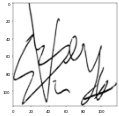

In [ ]:
plt.figure(dpi=28)
plt.imshow(img_A)

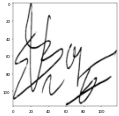

In [ ]:
plt.figure(dpi=28)
plt.imshow(img_B)

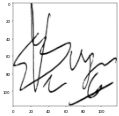

In [ ]:
plt.figure(dpi=28)
plt.imshow(img_C)

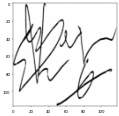

In [ ]:
plt.figure(dpi=28)
plt.imshow(img_D)

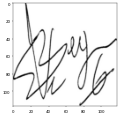

In [ ]:
plt.figure(dpi=28)
plt.imshow(img_E)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_accuracy(predictions, labels, thresholds):
    num_pairs = len(labels)
    num_images_per_pair = 5

    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    labels = np.repeat(labels, num_images_per_pair)

    accuracies = []
    if isinstance(thresholds, list):
        for threshold in thresholds:
            idx1 = predictions > threshold
            idx2 = predictions <= threshold

            tp = 0
            fn = 0
            fp = 0
            tn = 0

            for i in range(num_pairs):
                pair_start = i * num_images_per_pair
                pair_end = (i + 1) * num_images_per_pair

                if np.all(labels[pair_start:pair_end] == 1):
                    tp += np.sum(idx1[pair_start:pair_end])
                    fn += np.sum(idx2[pair_start:pair_end])
                else:
                    fp += np.sum(idx1[pair_start:pair_end])
                    tn += np.sum(idx2[pair_start:pair_end])

            accuracy = float(tp + tn) / (tp + tn + fp + fn)
            accuracies.append(accuracy)
    else:
        threshold = thresholds
        idx1 = predictions > threshold
        idx2 = predictions <= threshold

        tp = 0
        fn = 0
        fp = 0
        tn = 0

        for i in range(num_pairs):
            pair_start = i * num_images_per_pair
            pair_end = (i + 1) * num_images_per_pair

            if np.all(labels[pair_start:pair_end] == 1):
                tp += np.sum(idx1[pair_start:pair_end])
                fn += np.sum(idx2[pair_start:pair_end])
            else:
                fp += np.sum(idx1[pair_start:pair_end])
                tn += np.sum(idx2[pair_start:pair_end])

        accuracy = float(tp + tn) / (tp + tn + fp + fn)
        accuracies.append(accuracy)

    return accuracies

In [ ]:
#trytry
import numpy as np
import matplotlib.pyplot as plt

def compute_accuracy(predictions, labels, thresholds):
    num_pairs = len(labels)
    num_images_per_pair = 5

    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    labels = np.repeat(labels, num_images_per_pair)

    accuracies = []
    if isinstance(thresholds, list):
        for threshold in thresholds:
            idx1 = predictions > threshold
            idx2 = predictions <= threshold

            tp = 0
            fn = 0
            fp = 0
            tn = 0

            for i in range(num_pairs):
                pair_start = i * num_images_per_pair
                pair_end = ((i + 1) * num_images_per_pair)-1

                if np.all(labels[pair_start:pair_end] == 1):
                    tp += np.sum(idx1[pair_start:pair_end])
                    fn += np.sum(idx2[pair_start:pair_end])
                else:
                    fp += np.sum(idx1[pair_start:pair_end])
                    tn += np.sum(idx2[pair_start:pair_end])

            accuracy = float(tp + tn) / (tp + tn + fp + fn)
            accuracies.append(accuracy)
    else:
        threshold = thresholds
        idx1 = predictions > threshold
        idx2 = predictions <= threshold

        tp = 0
        fn = 0
        fp = 0
        tn = 0

        for i in range(num_pairs):
            pair_start = i * num_images_per_pair
            pair_end = ((i + 1) * num_images_per_pair)-1

            if np.all(labels[pair_start:pair_end] == 1):
                tp += np.sum(idx1[pair_start:pair_end])
                fn += np.sum(idx2[pair_start:pair_end])
            else:
                fp += np.sum(idx1[pair_start:pair_end])
                tn += np.sum(idx2[pair_start:pair_end])

        accuracy = float(tp + tn) / (tp + tn + fp + fn)
        accuracies.append(accuracy)

    return accuracies

13/13 [==============================] - 11s 100ms/step
at threshold  0.1 accuracy =  0.42342342342342343
at threshold  0.15 accuracy =  0.42342342342342343
at threshold  0.2 accuracy =  0.42342342342342343
at threshold  0.23 accuracy =  0.42342342342342343
at threshold  0.25 accuracy =  0.42342342342342343
at threshold  0.3 accuracy =  0.42342342342342343
at threshold  0.35 accuracy =  0.42342342342342343
at threshold  0.4 accuracy =  0.42342342342342343
at threshold  0.42 accuracy =  0.42342342342342343
at threshold  0.45 accuracy =  0.42342342342342343
at threshold  0.47354182600975037 accuracy =  0.42342342342342343
at threshold  0.475 accuracy =  0.46846846846846846
at threshold  0.48 accuracy =  0.48348348348348347
at threshold  0.489 accuracy =  0.6126126126126126
at threshold  0.5 accuracy =  0.6246246246246246
at threshold  0.51 accuracy =  0.6156156156156156
at threshold  0.52 accuracy =  0.5975975975975976
at threshold  0.535 accuracy =  0.5975975975975976
at threshold  0.55

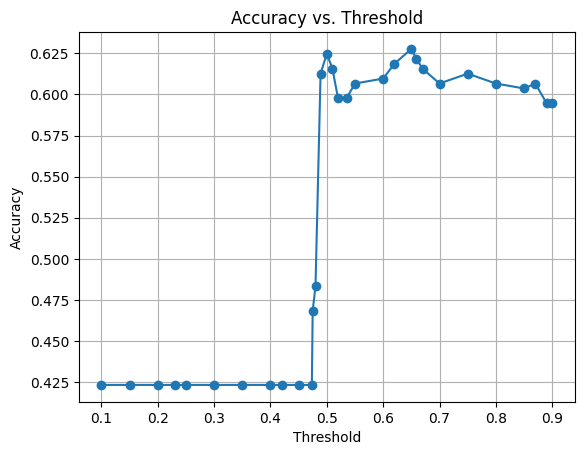

In [ ]:
# run this
predicted_distances = model.predict([X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]])
"""
thresholds = [0.10,0.15,0.20,0.23,0.25,0.30,0.35,0.40,0.42,0.45,0.47354182600975037
,0.50,0.51,0.52,0.535,0.55,0.60,0.65,0.67,0.70,0.75,0.80,0.85,0.87,0.89,0.90]
"""
thresholds = [0.10,0.15,0.20,0.23,0.25,0.30,0.35,0.40,0.42,0.45,0.47354182600975037,0.475,0.48,0.489
,0.50,0.51,0.52,0.535,0.55,0.60,0.62,0.65,0.659,0.67,0.70,0.75,0.80,0.85,0.87,0.89,0.90]

labels=Y_test_pairs
accuracies = compute_accuracy(predicted_distances, labels, thresholds)
for i in range(len(thresholds)):
  print("at threshold ",thresholds[i],"accuracy = ",accuracies[i])
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()


In [ ]:
predicted_distances = model.predict([X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]])

accuracy, threshold = compute_accuracy_roc(predicted_distances.flatten(), Y_test_pairs)
print("Accuracy:", accuracy)
print("Threshold:", threshold)

13/13 [==============================] - 1s 107ms/step
[0.5178781  0.5369268  0.5196092  0.61926    0.6337436  0.6847782
 0.7425243  0.51042324 0.51795006 0.9912732  0.5693513  0.50879806
 0.97161746 0.5112467  0.5196092  0.99250317 0.8795936  0.5076352
 0.9945358  0.5102738  0.4737667  0.4737667  0.48661974 0.4737667
 0.47458866 0.4743593  0.47376674 0.4737667  0.5023994  0.8131543
 0.52253515 0.650877   0.6866483  0.8398424  0.4737667  0.76773536
 0.5829367  0.74382794 0.55249983 0.56999147 0.48023695 0.48023695
 0.48023695 0.48023695 0.48023695 0.48023695 0.48023695 0.48023695
 0.7680267  0.48023695 0.76176405 0.72589594 0.47726    0.5090781
 0.73261636 0.7249054  0.48023695 0.48023695 0.48023695 0.48023695
 0.48023695 0.47412145 0.48023695 0.48023695 0.8906698  0.9551501
 0.48023695 0.6195759  0.96794474 0.9791116  0.48166627 0.47402713
 0.92098856 0.933456   0.5563054  0.4754694  0.86150837 0.953959
 0.57966244 0.47554013 0.93433905 0.89628047 0.5321437  0.63095677
 0.5272781  0.5

In [ ]:
result = model.predict([img_A.reshape((1, 118, 118, 3)),
                        img_B.reshape((1, 118, 118, 3)),
                        img_C.reshape((1, 118, 118, 3)),
                        img_D.reshape((1, 118, 118, 3)),
                        img_E.reshape((1, 118, 118, 3))])

prediction = result.flatten()[0] > 0.5
#print("Prediction:", bool(prediction))
threshold1=0.65
difference=result[0][0]
if difference > threshold1:
  print("Its a Forged Signature")
else:
  print("Its a Genuine Signature")
difference


1/1 [==============================] - 1s 733ms/step
Its a Genuine Signature


0.56463253

In [ ]:
difference_arr=[]
for i in range(len(X_test_pairs)-1):
  im=i
  img_A = imread(os.path.join(SIGN_PATH, test_df["GENUINE1"][im]))
  img_B = imread(os.path.join(SIGN_PATH, test_df["GENUINE2"][im]))
  img_C = imread(os.path.join(SIGN_PATH, test_df["GENUINE3"][im]))
  img_D = imread(os.path.join(SIGN_PATH, test_df["GENUINE4"][im]))
  img_E = imread(os.path.join(SIGN_PATH, test_df["TEST"][im]))
  label_A = y_test_arr[im]
  label_B = y_test_arr[im]
  label_C = y_test_arr[im]
  label_D = y_test_arr[im]
  label_E = y_test_arr[im]
  img_A = resize(img_A, (118, 118, 3))
  img_B = resize(img_B, (118, 118, 3))
  img_C = resize(img_C, (118, 118, 3))
  img_D = resize(img_D, (118, 118, 3))
  img_E = resize(img_E, (118, 118, 3))
  result = model.predict([img_A.reshape((1, 118, 118, 3)),
                        img_B.reshape((1, 118, 118, 3)),
                        img_C.reshape((1, 118, 118, 3)),
                        img_D.reshape((1, 118, 118, 3)),
                        img_E.reshape((1, 118, 118, 3))])
  difference_arr.append(result[0][0])








1/1 [==============================] - 0s 30ms/step


In [ ]:
im=87
img_A = imread(os.path.join(SIGN_PATH, test_df["GENUINE1"][im]))
img_B = imread(os.path.join(SIGN_PATH, test_df["GENUINE2"][im]))
img_C = imread(os.path.join(SIGN_PATH, test_df["GENUINE3"][im]))
img_D = imread(os.path.join(SIGN_PATH, test_df["GENUINE4"][im]))
img_E = imread(os.path.join(SIGN_PATH, test_df["TEST"][im]))

label_A = y_test_arr[im]
label_B = y_test_arr[im]
label_C = y_test_arr[im]
label_D = y_test_arr[im]
label_E = y_test_arr[im]

img_A = resize(img_A, (118, 118, 3))
img_B = resize(img_B, (118, 118, 3))
img_C = resize(img_C, (118, 118, 3))
img_D = resize(img_D, (118, 118, 3))
img_E = resize(img_E, (118, 118, 3))


In [ ]:
threshold1=0.65

In [ ]:
import numpy as np

def compute_accuracy_custom(distanc_accs, labels):
  tn=0
  fn=0
  tp=0
  fp=0
  print(distanc_accs)
  print(labels)
  finalacc=0
  for i in range(len(labels)-1):
    if distanc_accs[i]==int(labels[i]):
      finalacc=finalacc+1
    if distanc_accs[i]== 0 and int(labels[i])==0:
      tn=tn+1
    elif distanc_accs[i]==1 and int(labels[i])==1:
      tp=tp+1
    elif distanc_accs[i]==1 and int(labels[i])==0:
      fp=fp+1
    elif distanc_accs[i]==0 and int(labels[i])==1:
      fn=fn+1
  finalacc/=len(labels)
  print("final accuracy is ", finalacc)
  print("TRUE POSITIVE RATE = ", tp)
  print("TRUE NEGATIVE RATE = ", tn)
  print("FALSE POSITIVE RATE = ", fp)
  print("FALSE NEGATIVE RATE = ", fn)
  return finalacc

In [ ]:
final_acc=[]
for i in range (len(y_test_arr)-1):
  if difference_arr[i]>=threshold1:
    final_acc.append(0)
  elif difference_arr[i]<threshold1:
    final_acc.append(1)
final_acc_arr=np.array(final_acc)
print(final_acc_arr)
print(y_test_arr)
print(len(final_acc_arr))
print(len(y_test_arr))

[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0]
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

In [ ]:
compute_accuracy_custom(final_acc_arr,y_test_arr)

[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0]
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

0.6201923076923077